<center>
<img src="../../img/ods_stickers.jpg">
## Open Machine Learning Course
<center>Authors: Yury Kashnitsky, data scientist @ Mail.Ru Group, Ekaterina Demidova, data scientist @ Segmento <br>
Translated by Christina Butsko, Sergey Isaev and Artem Trunov <br>All content is distributed under the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license.

# <center> Topic 1. Exploratory data analysis with Pandas

<img align="center" src="https://habrastorage.org/files/10c/15f/f3d/10c15ff3dcb14abdbabdac53fed6d825.jpg"/>
<br>


### Plan of this article
 1. [About the course](http://localhost:8888/notebooks/jupyter_english/topic01/%5BENG%5D_topic1_habr_pandas.ipynb#1.-About-the-course)
 2. [Assignments](http://localhost:8888/notebooks/jupyter_english/topic01/%5BENG%5D_topic1_habr_pandas.ipynb#2.-Assignments)
 3. [Demonstration of main Pandas methods](http://localhost:8888/notebooks/jupyter_english/topic01/%5BENG%5D_topic1_habr_pandas.ipynb#3.-Demonstration-of-main-Pandas-methods)
 4. [First attempt on predicting telecom churn](http://localhost:8888/notebooks/jupyter_english/topic01/%5BENG%5D_topic1_habr_pandas.ipynb#4.-First-attempt-on-predicting-telecom-churn)
 5. [Assignment 1](http://localhost:8888/notebooks/jupyter_english/topic01/%5BENG%5D_topic1_habr_pandas.ipynb#5.-Assignment-1)
 6. [Useful resources](http://localhost:8888/notebooks/jupyter_english/topic01/%5BENG%5D_topic1_habr_pandas.ipynb#6.-Useful-resources)



## 1. About the course

With this article we, OpenDataScience, launch an open Machine Learning & Data Analysis course. We do not aim at developing another *comprehensive* introductory course on machine learning or data analysis (so it’s not a substitute for fundamental education or online/offline courses/specializations and books). The purpose of this series of articles is to quickly refresh your knowledge and help you find topics for further investigation. Our approach is similar to that of the authors of the [Deep Learning book](http://www.deeplearningbook.org/), which starts with a review of mathematics and basics of machine learning – short, concise, with many references to other resources. 

The course is aimed at a perfect balance of theory and practice, so each topic is followed by an **assignment**. Also, you can take part in several Kaggle Inclass **competitions** held during the course. The course is currently self-paced, but still deadlines are given to motivate the participants.

### Syllabus
1. Exploratory data analysis with Pandas
1. Visual data analysis with Python
1. Classification, decision trees and k Nearest Neighbors
1. Linear classification and regression
1. Bagging and random forest
1. Feature engineering and feature selection
1. Unsupervised learning: Principal Component Anslysis and clustering
1. Vowpal Wabbit: learning with gigabytes of data
1. Time series analysis with Python
1. Gradient boosting

### Prereqiusites
Among prerequisites are knowledge of basic concepts from calculus, linear algebra, probability theory and statistics and Python programming skills. If you need to catch up, a good resource will be [Part I](http://www.deeplearningbook.org/contents/part_basics.html) of the "Deep Learning" book and various math and Python online courses (for Python actually CodeAcademy will do). More info is available on the corresponding [Wiki page](https://github.com/Yorko/mlcourse_open/wiki/Prerequisites:-Python,-math-and-DevOps).

### What software you’ll need
As for now, you’ll only need [Anaconda](https://www.continuum.io/downloads) build with Python 3.6 to reproduce the code in the course. Later in the course you’ll have to install other libraries like Xgboost and Vowpal Wabbit.

You can also resort to the [Docker container](https://hub.docker.com/r/festline/mlcourse_open/) with all necessary software already installed. More info is available on the corresponding [Wiki page](https://github.com/Yorko/mlcourse_open/wiki/Software-requirements-and-Docker-container).

## 2. Assignments

- Each article comes with an assignment in a form of a [Jupyter](http://jupyter.org) notebook. The task will be to fill in the absent code snippets and choose answers to questions in a Google Quiz form. 
- Each assignment is due in a week with hard deadlines;
- Please discuss the course content (articles and assignments) via comments to articles on Medium
- The solutions to assignments will be sent to those who have filled in the corresponding Google form

## 3. Demonstration of main Pandas methods 

**[Pandas](http://pandas.pydata.org)** is a Python library that provides extensive means for data analysis. Data scientists work with data that is often stored in table formats like `.csv`, `.tsv`, or `.xlsx`. Pandas makes it very convenient to load, process and analyze such tabular data using SQL-like queries. And in conjunction with `Matplotlib` and `Seaborn`, `Pandas` provides a wide range of opportunities for visual analysis of tabular data.

The main data structures in `Pandas` are implemented with **Series** and **DataFrame** classes. The former is a one-dimensional indexed array of some fixed data type. The latter is a two-dimensional data structure - a table - where each column contains data of the same type. You can see it as a dictionary of `Series` instances. `DataFrames` are great for representing real data: rows correspond to instances (objects, observations, whatever), and columns correspond to features of these instances.


In [1]:
import pandas as pd
import numpy as np


We’ll demonstrate the main methods in action by analyzing the [dataset](https://bigml.com/user/francisco/gallery/dataset/5163ad540c0b5e5b22000383) on the churn rate of telecom operator clients. Let’s read the data (`read_csv`) and take a look at the first 5 lines using the `head` method:


In [2]:
df = pd.read_csv('../../data/telecom_churn.csv')
df.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

<details>
<summary>About printing DataFrames in Jupyter notebooks</summary>
<p>
In Jupyter notebooks Pandas DataFrames are printed as these pretty tables while `print(df.head())` looks worse.
By default, Pandas displays 20 columns and 60 rows, so if your DataFrame is bigger use the `set_option` function:

```python
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
```
</p>
</details>

Each row corresponds to one client, the **object** of our research. Columns are **features** of the object.

**Let’s have a look at data dimensionality, features names and geature types.**

In [3]:
print(df.shape)

(3333, 20)


We can see that the table contains 3333 rows and 20 columns. Let’s print out column names:

In [4]:
print(df.columns)

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')


We can use the `info()` method to outout some general information about the dataframe: 

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
State                     3333 non-null object
Account length            3333 non-null int64
Area code                 3333 non-null int64
International plan        3333 non-null object
Voice mail plan           3333 non-null object
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null float64
Total day calls           3333 non-null int64
Total day charge          3333 non-null float64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null int64
Total eve charge          3333 non-null float64
Total night minutes       3333 non-null float64
Total night calls         3333 non-null int64
Total night charge        3333 non-null float64
Total intl minutes        3333 non-null float64
Total intl calls          3333 non-null int64
Total intl charge         3333 non-null float64
Customer service calls    3333 non-null int64



`bool`, `int64`, `float64` and `object` are types of features. We see that one feature is logical (`bool`), 3 features are of type `object` and 16 features are numeric. With the same method we can easily see if there are missing values, but here there are none of them, each column contains 3333 observations.

We can **change the column type** with the `astype` method. Let’s apply this method to the `Churn` feature and convert it into `int64`:


In [6]:
df['Churn'] = df['Churn'].astype('int64')


The `describe` method shows basic statistical characteristics of each numerical feature (`int64` and `float64` types): number of non-missing values, mean, standard deviation, range, median, 0.25 and 0.75 quartiles.

In [7]:
df.describe()

Account length    Area code  Number vmail messages  Total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       Total day calls  Total day charge  Total eve minutes  Total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       Total eve charge  Total night minutes  Total night calls  \
count       3333.000000          3333.000000        3333.000000   
mean          17.083540           200.872037         100.107711   
std            4.310668            50.573847          19.568609   
min            0.000000            23.200000          33.000000   
25%           14.160000           167.000000          87.000000   
50%           17.120000           201.200000         100.000000   
75%           20.000000           235.300000         113.000000   
max           30.910000           395.000000         175.000000   

       Total night charge  Total intl minutes  Total intl calls  \
count         3333.000000         3333.000000       3333.000000   
mean             9.039325           10.237294          4.479448   
std              2.275873            2.791840          2.461214   
min              1.040000            0.000000          0.000000   
25%              7.520000            8.500000          3.000000   
50%              9.050000           10.300000          4.000000   
75%             10.590000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       Total intl charge  Customer service calls        Churn  
count        3333.000000             3333.000000  3333.000000  
mean            2.764581                1.562856     0.144914  
std             0.753773                1.315491     0.352067  
min             0.000000                0.000000     0.000000  
25%             2.300000                1.000000     0.000000  
50%             2.780000                1.000000     0.000000  
75%             3.270000                2.000000     0.000000  
max             5.400000                9.000000     1.000000

In order to see statistics on non-numerical features, one has to explicitly indicate data types of interest in the `include` parameter.

In [8]:
df.describe(include=['object', 'bool'])

State International plan Voice mail plan
count   3333               3333            3333
unique    51                  2               2
top       WV                 No              No
freq     106               3010            2411

For categorical (type `object`) and boolean (type `bool`) features we can use the `value_counts` method. Let’s have a look at Churn distribution:

In [9]:
df['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

2850 users out of 3333 are loyal, their `Churn` value is `0`. To calculate shares, one might pass `normalize=True` to the `value_counts` function.

In [10]:
df['Churn'].value_counts(normalize=True)

0    0.855086
1    0.144914
Name: Churn, dtype: float64


### Sorting

A DataFrame can be sorted by values of one of the variables. In our case, for example, it can be sorted by Total day charge (`ascending=False` for sorting in descending order):


In [11]:
df.sort_values(by='Total day charge', ascending=False).head()

State  Account length  Area code International plan Voice mail plan  \
365     CO             154        415                 No              No   
985     NY              64        415                Yes              No   
2594    OH             115        510                Yes              No   
156     OH              83        415                 No              No   
605     MO             112        415                 No              No   

      Number vmail messages  Total day minutes  Total day calls  \
365                       0              350.8               75   
985                       0              346.8               55   
2594                      0              345.3               81   
156                       0              337.4              120   
605                       0              335.5               77   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
365              59.64              216.5               94             18.40   
985              58.96              249.5               79             21.21   
2594             58.70              203.4              106             17.29   
156              57.36              227.4              116             19.33   
605              57.04              212.5              109             18.06   

      Total night minutes  Total night calls  Total night charge  \
365                 253.9                100               11.43   
985                 275.4                102               12.39   
2594                217.5                107                9.79   
156                 153.9                114                6.93   
605                 265.0                132               11.93   

      Total intl minutes  Total intl calls  Total intl charge  \
365                 10.1                 9               2.73   
985                 13.3                 9               3.59   
2594                11.8                 8               3.19   
156                 15.8                 7               4.27   
605                 12.7                 8               3.43   

      Customer service calls  Churn  
365                        1      1  
985                        1      1  
2594                       1      1  
156                        0      1  
605                        2      1

We can also sort by a group of columns:

In [12]:
df.sort_values(by=['Churn', 'Total day charge'],
        ascending=[True, False]).head()

State  Account length  Area code International plan Voice mail plan  \
688     MN              13        510                 No             Yes   
2259    NC             210        415                 No             Yes   
534     LA              67        510                 No              No   
575     SD             114        415                 No             Yes   
2858    AL             141        510                 No             Yes   

      Number vmail messages  Total day minutes  Total day calls  \
688                      21              315.6              105   
2259                     31              313.8               87   
534                       0              310.4               97   
575                      36              309.9               90   
2858                     28              308.0              123   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
688              53.65              208.9               71             17.76   
2259             53.35              147.7              103             12.55   
534              52.77               66.5              123              5.65   
575              52.68              200.3               89             17.03   
2858             52.36              247.8              128             21.06   

      Total night minutes  Total night calls  Total night charge  \
688                 260.1                123               11.70   
2259                192.7                 97                8.67   
534                 246.5                 99               11.09   
575                 183.5                105                8.26   
2858                152.9                103                6.88   

      Total intl minutes  Total intl calls  Total intl charge  \
688                 12.1                 3               3.27   
2259                10.1                 7               2.73   
534                  9.2                10               2.48   
575                 14.2                 2               3.83   
2858                 7.4                 3               2.00   

      Customer service calls  Churn  
688                        3      0  
2259                       3      0  
534                        4      0  
575                        1      0  
2858                       1      0


### Indexing and retrieving data

DataFrame can be indexed in different ways. 

To get a single column, you can use a `DataFrame['Name']` construction. Let's use this to answer the question: **what is the proportion of churned users in our dataframe?**



In [13]:
df['Churn'].mean()

0.14491449144914492


Actually, 14.5% is quite bad for a company, with such churn a rate it is possible to go bankrupt.

**Boolean indexing** with one column is also very convenient. The syntax is `df[P(df['Name'])]`, where `P` is some logical condition that is checked for each element of the `Name` column. The result of such indexing is the DataFrame consisting only of rows that satisfy the `P` condition on the `Name` column. 

Let’s use it to answer the question: **What are average values of numerical variables for churned users?**


In [14]:
df[df['Churn'] == 1].mean()

Account length            102.664596
Area code                 437.817805
Number vmail messages       5.115942
Total day minutes         206.914079
Total day calls           101.335404
Total day charge           35.175921
Total eve minutes         212.410145
Total eve calls           100.561077
Total eve charge           18.054969
Total night minutes       205.231677
Total night calls         100.399586
Total night charge          9.235528
Total intl minutes         10.700000
Total intl calls            4.163561
Total intl charge           2.889545
Customer service calls      2.229814
Churn                       1.000000
dtype: float64

**How much time (on average) do churned users spend on phone during daytime?**

In [15]:
df[df['Churn'] == 1]['Total day minutes'].mean()

206.91407867494814


**What is the maximum length of international calls among loyal users (`Churn == 0`) who do not have an international plan?**



In [16]:
df[(df['Churn'] == 0) & (df['International plan'] == 'No')]['Total intl minutes'].max()

18.899999999999999


DataFrames can be indexed both by column name (label) or row name (index), or by the serial number or a row. The `loc` method is used for **indexing by name**, while the `iloc()` is used for **indexing by number**.

In the first case we say *"give us the values of the rows with index from 0 to 5 (inclusive) and columns labeled from State to Area code (inclusive)"*, and in the second case we say *"give us the values of the first five rows in the first three columns (typical Python slice: the maximal value is not included)"*.


In [17]:
df.loc[0:5, 'State':'Area code']

State  Account length  Area code
0    KS             128        415
1    OH             107        415
2    NJ             137        415
3    OH              84        408
4    OK              75        415
5    AL             118        510

In [18]:
df.iloc[0:5, 0:3]

State  Account length  Area code
0    KS             128        415
1    OH             107        415
2    NJ             137        415
3    OH              84        408
4    OK              75        415

If we need the first or last line of the data frame, we use the `df[:1]` or `df[-1:]` construct:



In [19]:
df[-1:]

State  Account length  Area code International plan Voice mail plan  \
3332    TN              74        415                 No             Yes   

      Number vmail messages  Total day minutes  Total day calls  \
3332                     25              234.4              113   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
3332             39.85              265.9               82              22.6   

      Total night minutes  Total night calls  Total night charge  \
3332                241.4                 77               10.86   

      Total intl minutes  Total intl calls  Total intl charge  \
3332                13.7                 4                3.7   

      Customer service calls  Churn  
3332                       0      0


### Applying Functions to Cells, Columns and Rows

**To apply functions to each column, use `apply()`:**


In [20]:
df.apply(np.max) 

State                        WY
Account length              243
Area code                   510
International plan          Yes
Voice mail plan             Yes
Number vmail messages        51
Total day minutes         350.8
Total day calls             165
Total day charge          59.64
Total eve minutes         363.7
Total eve calls             170
Total eve charge          30.91
Total night minutes         395
Total night calls           175
Total night charge        17.77
Total intl minutes           20
Total intl calls             20
Total intl charge           5.4
Customer service calls        9
Churn                         1
dtype: object

The `apply` method can also be used to apply a function to each line. To do this, specify `axis=1`. Lambda functions are very convenient in such scenario. If for some reason we need to select all states starting with W, we can do it like this:

In [21]:
df[df['State'].apply(lambda state: state[0] == 'W')].head()

State  Account length  Area code International plan Voice mail plan  \
9     WV             141        415                Yes             Yes   
26    WY              57        408                 No             Yes   
44    WI              64        510                 No              No   
49    WY              97        415                 No             Yes   
54    WY              87        415                 No              No   

    Number vmail messages  Total day minutes  Total day calls  \
9                      37              258.6               84   
26                     39              213.0              115   
44                      0              154.0               67   
49                     24              133.2              135   
54                      0              151.0               83   

    Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
9              43.96              222.0              111             18.87   
26             36.21              191.1              112             16.24   
44             26.18              225.8              118             19.19   
49             22.64              217.2               58             18.46   
54             25.67              219.7              116             18.67   

    Total night minutes  Total night calls  Total night charge  \
9                 326.4                 97               14.69   
26                182.7                115                8.22   
44                265.3                 86               11.94   
49                 70.6                 79                3.18   
54                203.9                127                9.18   

    Total intl minutes  Total intl calls  Total intl charge  \
9                 11.2                 5               3.02   
26                 9.5                 3               2.57   
44                 3.5                 3               0.95   
49                11.0                 3               2.97   
54                 9.7                 3               2.62   

    Customer service calls  Churn  
9                        0      0  
26                       0      0  
44                       1      0  
49                       1      0  
54                       5      1

The `map` method can be used to **replace values in a column** by passing a dictionary of the form `{old_value: new_value}` as its argument:

In [22]:
d = {'No' : False, 'Yes' : True}
df['International plan'] = df['International plan'].map(d)
df.head()

State  Account length  Area code  International plan Voice mail plan  \
0    KS             128        415               False             Yes   
1    OH             107        415               False             Yes   
2    NJ             137        415               False              No   
3    OH              84        408                True              No   
4    OK              75        415                True              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1      0  
1                       1      0  
2                       0      0  
3                       2      0  
4                       3      0

Same thing can be done with the `replace` method:

In [23]:
df = df.replace({'Voice mail plan': d})
df.head()

State  Account length  Area code  International plan  Voice mail plan  \
0    KS             128        415               False             True   
1    OH             107        415               False             True   
2    NJ             137        415               False            False   
3    OH              84        408                True            False   
4    OK              75        415                True            False   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1      0  
1                       1      0  
2                       0      0  
3                       2      0  
4                       3      0


### Grouping

In general, grouping data in Pandas goes as follows:



```python
df.groupby(by=grouping_columns)[columns_to_show].function()
```


1. First, the `groupby` method divides the `grouping_columns` by their values. They become a new index in the resulting dataframe.
2. Then, columns of interest are selected (`columns_to_show`).
3. Finally, one or several functions are applied to the obtained groups per selected columns.

Further we group the data according to the values of the `Churn` variable and display statistics of three columns in each group:

In [24]:
columns_to_show = ['Total day minutes', 'Total eve minutes', 
                   'Total night minutes']

df.groupby(['Churn'])[columns_to_show].describe(percentiles=[])

Total day minutes                                            \
                  count        mean        std  min    50%    max   
Churn                                                               
0                2850.0  175.175754  50.181655  0.0  177.2  315.6   
1                 483.0  206.914079  68.997792  0.0  217.6  350.8   

      Total eve minutes                                             \
                  count        mean        std   min    50%    max   
Churn                                                                
0                2850.0  199.043298  50.292175   0.0  199.6  361.8   
1                 483.0  212.410145  51.728910  70.9  211.3  363.7   

      Total night minutes                                              
                    count        mean        std   min     50%    max  
Churn                                                                  
0                  2850.0  200.133193  51.105032  23.2  200.25  395.0  
1                   483.0  205.231677  47.132825  47.4  204.80  354.9

Let’s do the same thing slightly differently by passing a list of functions to `agg()`:

In [25]:
columns_to_show = ['Total day minutes', 'Total eve minutes', 
                   'Total night minutes']

df.groupby(['Churn'])[columns_to_show].agg([np.mean, np.std, np.min, 
                                            np.max])

Total day minutes                        Total eve minutes             \
                   mean        std amin   amax              mean        std   
Churn                                                                         
0            175.175754  50.181655  0.0  315.6        199.043298  50.292175   
1            206.914079  68.997792  0.0  350.8        212.410145  51.728910   

                   Total night minutes                          
       amin   amax                mean        std  amin   amax  
Churn                                                           
0       0.0  361.8          200.133193  51.105032  23.2  395.0  
1      70.9  363.7          205.231677  47.132825  47.4  354.9


### Summary tables

Suppose we want to see how the observations in our sample are distributed in the context of two variables - `Churn` and `International plan`. To do so, we can build a **contingency table** using the `crosstab` method:



In [26]:
pd.crosstab(df['Churn'], df['International plan'])

International plan  False  True 
Churn                           
0                    2664    186
1                     346    137

In [27]:
pd.crosstab(df['Churn'], df['Voice mail plan'], normalize=True)

Voice mail plan     False     True 
Churn                              
0                0.602460  0.252625
1                0.120912  0.024002

We can see that most of the users are loyal and do not use additional services (International Plan/Voice mail).

This will resemble **pivot tables** to those familiar with Excel. And of course, pivot tables are implemented in Pandas: the `pivot_table` method takes the following parameters:

* `values` - a list of variables to calculate statistics for,
* `index` – a list of variables to group data by,
* `aggfunc` — what statistics we need to calculate for groups - e.g sum, mean, maximum, minimum or something else.

Let’s take a look at average numbers of day, evening and night calls for different Area codes:

In [28]:
df.pivot_table(['Total day calls', 'Total eve calls', 'Total night calls'],
               ['Area code'], aggfunc='mean')

Total day calls  Total eve calls  Total night calls
Area code                                                     
408             100.496420        99.788783          99.039379
415             100.576435       100.503927         100.398187
510             100.097619        99.671429         100.601190


### DataFrame transformations

Like many other things in Pandas, adding columns to a DataFrame is feasible in several ways.

For example, we want to calculate the total number of calls for all users. Let’s create the `total_calls` Series and paste it into the DataFrame:



In [29]:
total_calls = df['Total day calls'] + df['Total eve calls'] + \
    df['Total night calls'] + df['Total intl calls']
df.insert(loc=len(df.columns), column='Total calls', value=total_calls) 
# loc parameter is the number of columns after which to insert the Series object
# we set it to len(df.columns) to paste it at the very end of the dataframe
df.head()

State  Account length  Area code  International plan  Voice mail plan  \
0    KS             128        415               False             True   
1    OH             107        415               False             True   
2    NJ             137        415               False            False   
3    OH              84        408                True            False   
4    OK              75        415                True            False   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes     ...       Total eve charge  \
0             45.07              197.4     ...                  16.78   
1             27.47              195.5     ...                  16.62   
2             41.38              121.2     ...                  10.30   
3             50.90               61.9     ...                   5.26   
4             28.34              148.3     ...                  12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  Total calls  
0                       1      0          303  
1                       1      0          332  
2                       0      0          333  
3                       2      0          255  
4                       3      0          359  

[5 rows x 21 columns]

It is possible to add a column easier, without creating an intermediate Series instance:

In [30]:
df['Total charge'] = df['Total day charge'] + df['Total eve charge'] + \
    df['Total night charge'] + df['Total intl charge']

df.head()

State  Account length  Area code  International plan  Voice mail plan  \
0    KS             128        415               False             True   
1    OH             107        415               False             True   
2    NJ             137        415               False            False   
3    OH              84        408                True            False   
4    OK              75        415                True            False   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes      ...       Total night minutes  \
0             45.07              197.4      ...                     244.7   
1             27.47              195.5      ...                     254.4   
2             41.38              121.2      ...                     162.6   
3             50.90               61.9      ...                     196.9   
4             28.34              148.3      ...                     186.9   

   Total night calls  Total night charge  Total intl minutes  \
0                 91               11.01                10.0   
1                103               11.45                13.7   
2                104                7.32                12.2   
3                 89                8.86                 6.6   
4                121                8.41                10.1   

   Total intl calls  Total intl charge  Customer service calls  Churn  \
0                 3               2.70                       1      0   
1                 3               3.70                       1      0   
2                 5               3.29                       0      0   
3                 7               1.78                       2      0   
4                 3               2.73                       3      0   

   Total calls  Total charge  
0          303         75.56  
1          332         59.24  
2          333         62.29  
3          255         66.80  
4          359         52.09  

[5 rows x 22 columns]

To delete columns or rows, use the `drop` method, passing the required indexes and the `axis` parameter (`1` if you delete columns, and nothing or `0` if you delete rows) as an argument. The `inplace` argument tells whether to change the original DataFrame. With `inplace=False` the `drop` method doesn't change the DataFrame and returns a new one, with dropped rows or columns. With `inplace=True` it changes the DataFrame.

In [31]:
# get rid of just created columns
df.drop(['Total charge', 'Total calls'], axis=1, inplace=True) 
# and here’s how you can delete rows
df.drop([1, 2]).head() 

State  Account length  Area code  International plan  Voice mail plan  \
0    KS             128        415               False             True   
3    OH              84        408                True            False   
4    OK              75        415                True            False   
5    AL             118        510                True            False   
6    MA             121        510               False             True   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
3                      0              299.4               71   
4                      0              166.7              113   
5                      0              223.4               98   
6                     24              218.2               88   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   
5             37.98              220.6              101             18.75   
6             37.09              348.5              108             29.62   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
3                196.9                 89                8.86   
4                186.9                121                8.41   
5                203.9                118                9.18   
6                212.6                118                9.57   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   
5                 6.3                 6               1.70   
6                 7.5                 7               2.03   

   Customer service calls  Churn  
0                       1      0  
3                       2      0  
4                       3      0  
5                       0      0  
6                       3      0


## 4. First attempt on predicting telecom churn


Let's see how churn rate is related to the *International plan* variable. We’ll do this using a `crosstab` contingency table and also through visual analysis with `Seaborn` (however, visual analysis is a topic of the next article).


In [32]:
pd.crosstab(df['Churn'], df['International plan'], margins=True)

International plan  False  True   All
Churn                                
0                    2664   186  2850
1                     346   137   483
All                  3010   323  3333

In [33]:
# some imports and "magic" commands to set up plotting 
%matplotlib inline 
import matplotlib.pyplot as plt
# pip install seaborn 
import seaborn as sns
plt.rcParams['figure.figsize'] = (8, 6)

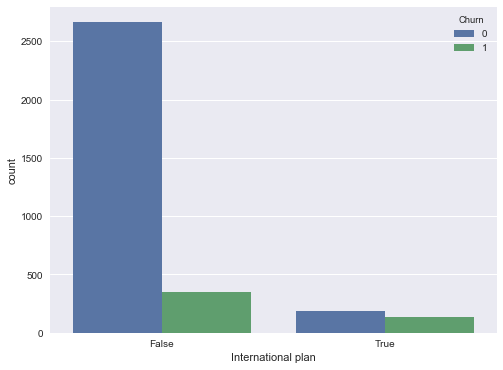

In [34]:
sns.countplot(x='International plan', hue='Churn', data=df);


We see that with *International Plan* the churn rate is much higher - that’s an interesting observation! Perhaps large and poorly controlled expenses with international calls are very conflict-prone and lead to dissatisfaction among the telecom operator's customers and, hence, to higher churn.

Next, let’s look at another important feature – *Customer service calls*. Let’s also make a summary table and a picture.

In [35]:
pd.crosstab(df['Churn'], df['Customer service calls'], margins=True)

Customer service calls    0     1    2    3    4   5   6  7  8  9   All
Churn                                                                  
0                       605  1059  672  385   90  26   8  4  1  0  2850
1                        92   122   87   44   76  40  14  5  1  2   483
All                     697  1181  759  429  166  66  22  9  2  2  3333

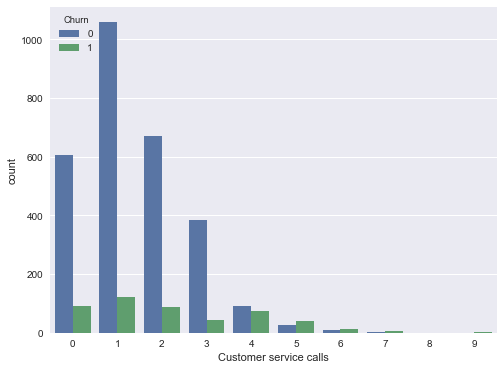

In [36]:
sns.countplot(x='Customer service calls', hue='Churn', data=df);


Perhaps, it is not so obvious from the summary table (or it's boring to creep along the lines with numbers), but the picture clearly states that the churn rate strongly increases starting from 4 calls to the service center. 

Let’s now add a binary attribute to our DataFrame – `Customer service calls > 3`. And once again, let's see how it relates to the churn. 


In [37]:
df['Many_service_calls'] = (df['Customer service calls'] > 3).astype('int')

pd.crosstab(df['Many_service_calls'], df['Churn'], margins=True)

Churn                  0    1   All
Many_service_calls                 
0                   2721  345  3066
1                    129  138   267
All                 2850  483  3333

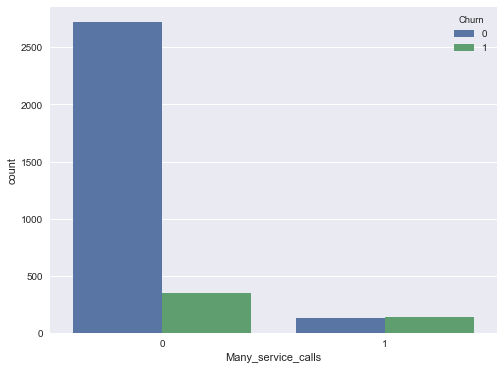

In [38]:
sns.countplot(x='Many_service_calls', hue='Churn', data=df);


Let’s construct another contingence table that relates *Churn* with both *International plan* and freshly created *Many_service_calls*.



In [39]:
pd.crosstab(df['Many_service_calls'] & df['International plan'] , df['Churn'])

Churn     0    1
row_0           
False  2841  464
True      9   19

Therefore, predicting that customer is loyal (*Churn*=0) in case when the number of calls to the service center is less than 4 and *International Plan* is added (and predicting *Churn*=1 otherwise), we might expect about 85.8% of guesses (we are mistaken only 464 + 9 times). This number 85.8% that we got with very simple reasoning is a good starting point (*baseline*) for the further machine learning models that we will build. 

In general, before the advent of machine learning, the data analysis process looked something like this. Let's recap:
    
- The share of loyal clients in the sample is 85.5%. The most naive model that always predicts a "loyal customer" on such data will guess right in about 85.5% of all cases. That is, the proportion of correct answers (*accuracy*) of subsequent models should be no less than this number, and better be significantly higher;
- With the help of a simple forecast that can be expressed by the following formula: "International plan = False & Customer Service calls <4 => Churn = 0, else Churn = 1", we can expect a guessing rate of 85.8%, which is just above 85.5%. Subsequently, we'll talk about decision trees and figure out how to find such rules automatically based only on the input data;
- We got these two baselines without applying machine learning, and they’ll serve as the starting point for our subsequent models. If it turns out that with enormous efforts we increase the share of correct answers by 0.5%, persay, then perhaps we are doing something wrong, and it suffices to confine ourselves to a simple model with two conditions;
- Before training complex models it is recommended to twist the data a bit, make some plots and check simple assumptions. Moreover, in business applications of machine learning, they usually start with simple solutions, and then experiment with more complex ones.


## 5. Assignment 1
*(to be released on Feb, 5)*

In the first assignment you'll analyze the UCI Adult data set containing demographic information about the US residents.

We suggest that you complete tasks in the [Jupyter notebook](https://github.com/Yorko/mlcourse_open/blob/master/jupyter_notebooks/topic1_pandas_data_analysis/hw1_adult_pandas.ipynb) and then answer 10 questions in the [Google form](https://docs.google.com/forms/d/1ws9mchvdVGRyva_y_cPjASED8ATZTOsQFKfimohNaFE). The answers can still be modified even after submitting the form.

**Hard deadline**: February 12, 23:59 CET

## 6. Useful resources

* First of all, of course, the [official documentation of Pandas](http://pandas.pydata.org/pandas-docs/stable/index.html)
* [10 minutes to pandas](http://pandas.pydata.org/pandas-docs/stable/10min.html)
* [Pandas cheatsheet PDF](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
* GitHub repos: [Pandas exercises](https://github.com/guipsamora/pandas_exercises/) and ["Effective Pandas"](https://github.com/TomAugspurger/effective-pandas)
* [scipy-lectures.org](http://www.scipy-lectures.org/index.html) — tutorials on pandas, numpy, matplotlib and scikit-learn